In [11]:
import engine as ng
import test_suite as tst

test = tst.Test4()
scheme = ng.MUSCL(test)

scheme.compute(scheme.tFinal)

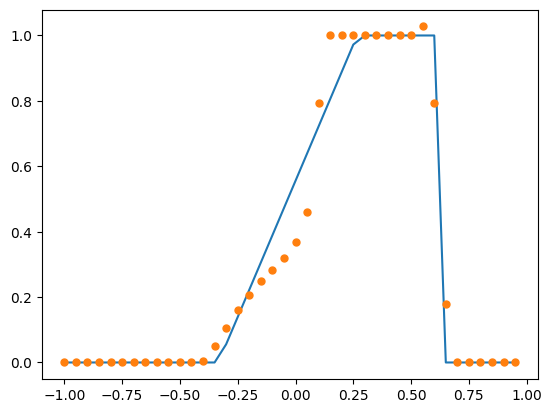

In [12]:
import matplotlib.pyplot as plt
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")